In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *
from plotting import *

In [3]:
def filter_results(df, pattern) :
    return df.filter(regex=pattern, axis=0)

In [4]:
def get_results(data_name) :
    yr_df = []
    for model in ['baselines', 'Basic', 'Attention', 'Structured Attention', 'Hierarchical Attention'] :
        name = os.path.join('outputs/', data_name, model)
        if os.path.exists(name) :
            dirs = os.listdir(name)
            dfs = {}
            for d in sorted(dirs) :
                dirname = os.path.join(name, d)
                if os.path.isdir(dirname) :
                    model_name = get_latest_model(dirname)
                    if model_name is not None :
                        df = json.load(open(os.path.join(model_name, 'evaluate.json')))
                        dfs[d] = {k:v for k, v in df.items()}

            dfs = pd.DataFrame(dfs).transpose()
            yr_df += [dfs]

    yr_df = pd.concat(yr_df, axis=0).round(3)
    return yr_df

In [40]:
def generate_lr_graphs(name, lr_results, metric) :
    lr_results['model_type'] = [x.split('+')[1] for x in lr_results.index]
    lr_results['norm'] = [x.split('+')[2].split('=')[1] if len(x.split('+')) > 2 else None for x in lr_results.index]
    lr_results['Structured'] = [True if len(x.split('+')) > 3 else False for x in lr_results.index]
    lr_results = lr_results[~lr_results['model_type'].isin(['Structured', 'LDA'])]
#     fig = sns.pointplot(x='norm', y=metric, hue='model_type', data=lr_results[lr_results['Structured'] == True], dodge=True, scale=0.5)
#     sns.despine()
#     fig.axes.get_legend().remove()
#     fig.figure.savefig('Text-encoding-EHR/results/'+name+'/lr_results_structured.pdf', bbox_inches='tight')
#     plt.show()
    fig = sns.pointplot(x='norm', y=metric, hue='model_type', data=lr_results[lr_results['Structured'] == False], dodge=True, scale=0.5)
    sns.despine()
#     fig.axes.get_legend().remove()
    fig.figure.savefig('Text-encoding-EHR/results/'+name+'/lr_results_unstructured.pdf', bbox_inches='tight')
    plt.show()

/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

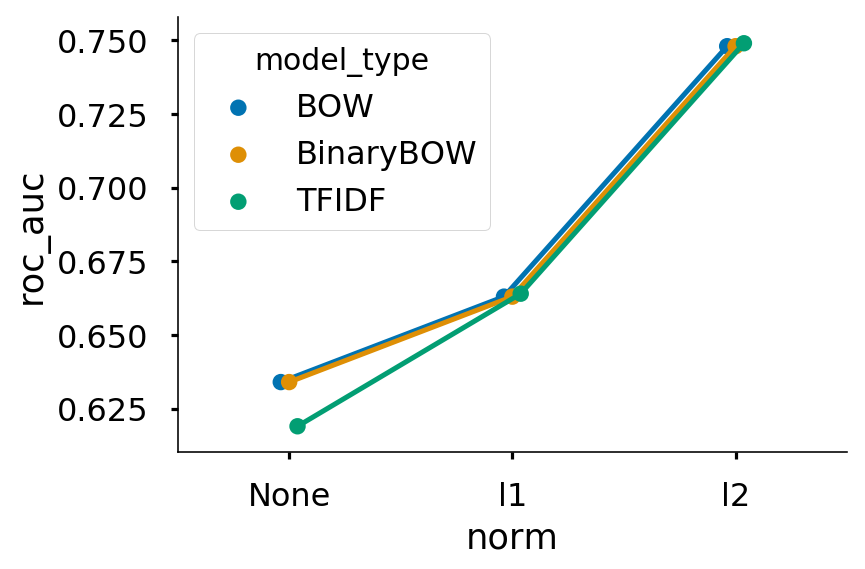

In [41]:
df_readmission = get_results('Readmission')
generate_lr_graphs('Readmission', filter_results(df_readmission, 'LR+'), metric='roc_auc')

/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

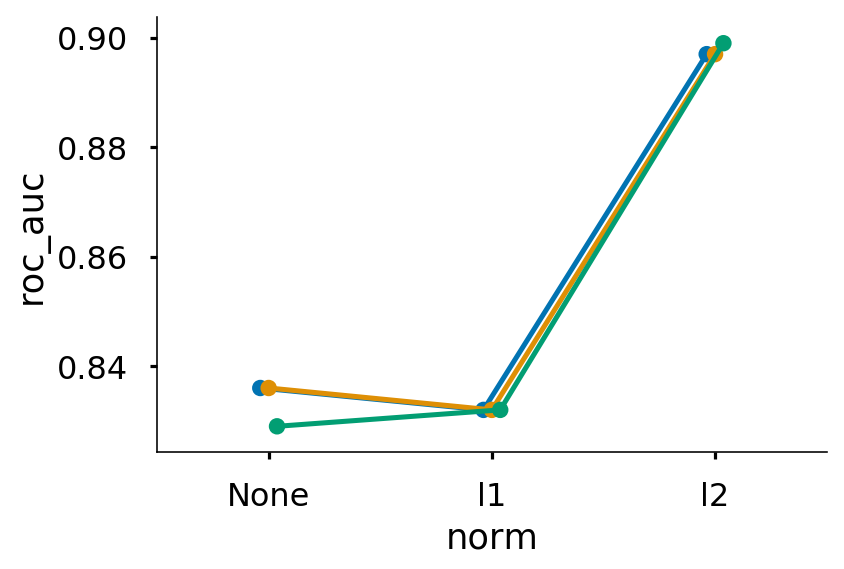

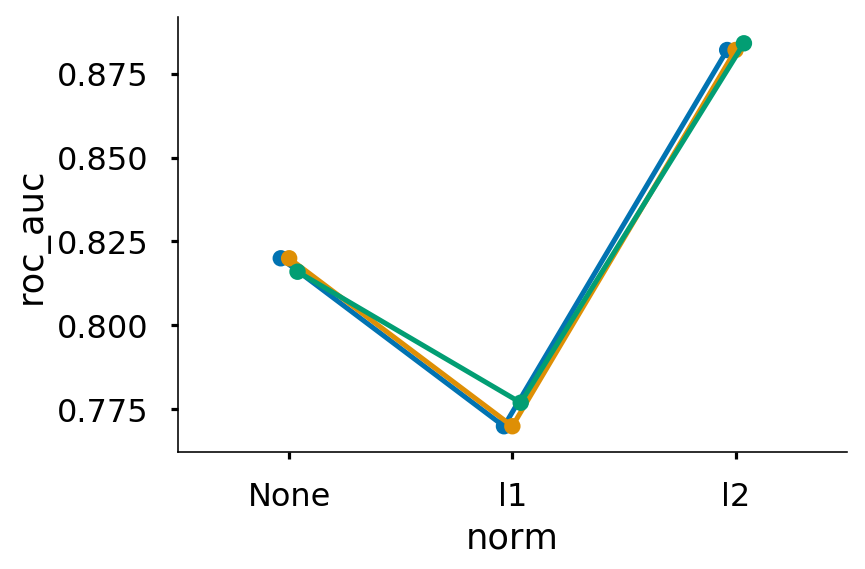

In [33]:
df_readmission = get_results('Mortality_1yr')
generate_lr_graphs('Mortality_1yr', filter_results(df_readmission, 'LR+'), metric='roc_auc')

/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

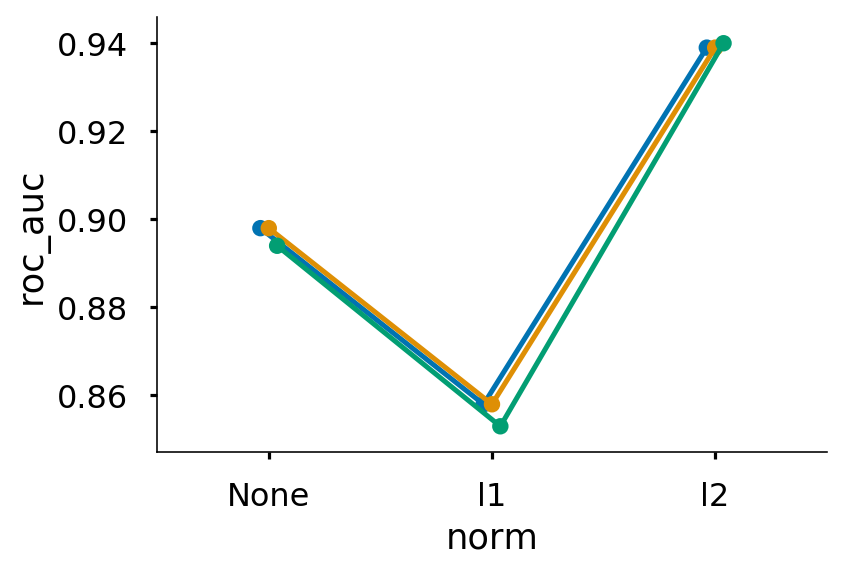

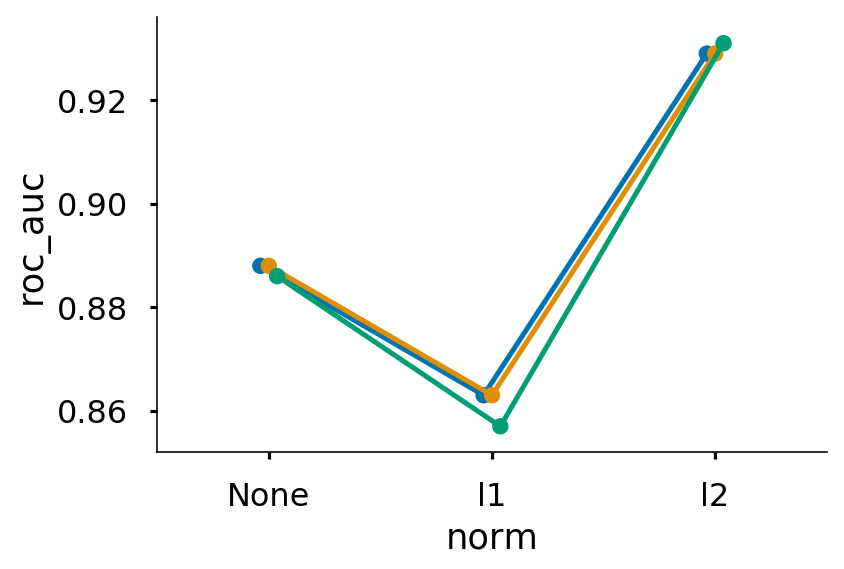

In [34]:
df_readmission = get_results('Mortality_30day')
generate_lr_graphs('Mortality_30day', filter_results(df_readmission, 'LR+'), metric='roc_auc')

/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

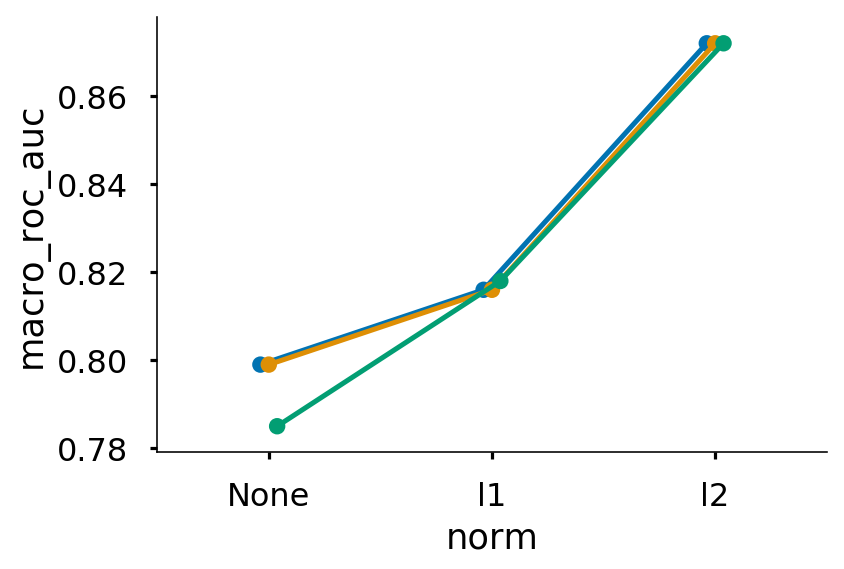

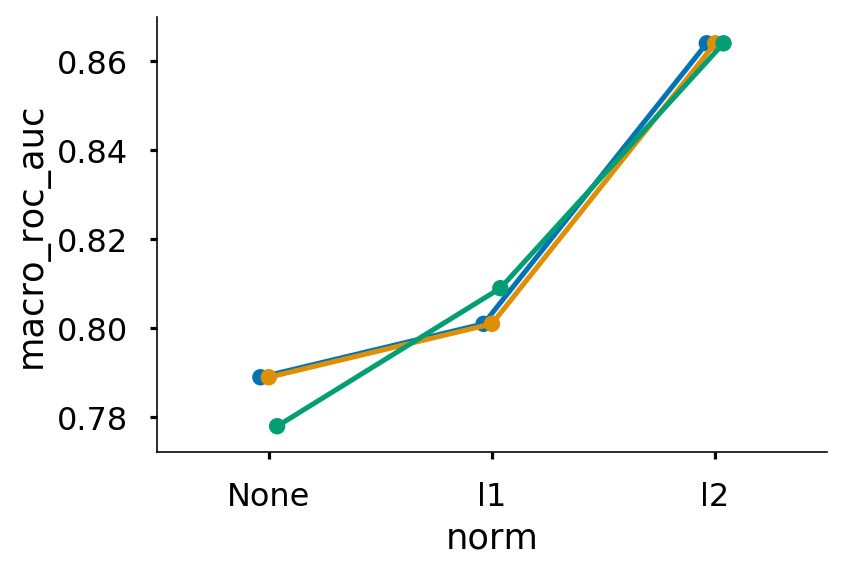

In [35]:
df_readmission = get_results('Diagnosis')
generate_lr_graphs('Diagnosis', filter_results(df_readmission, 'LR+'), metric='macro_roc_auc')

/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

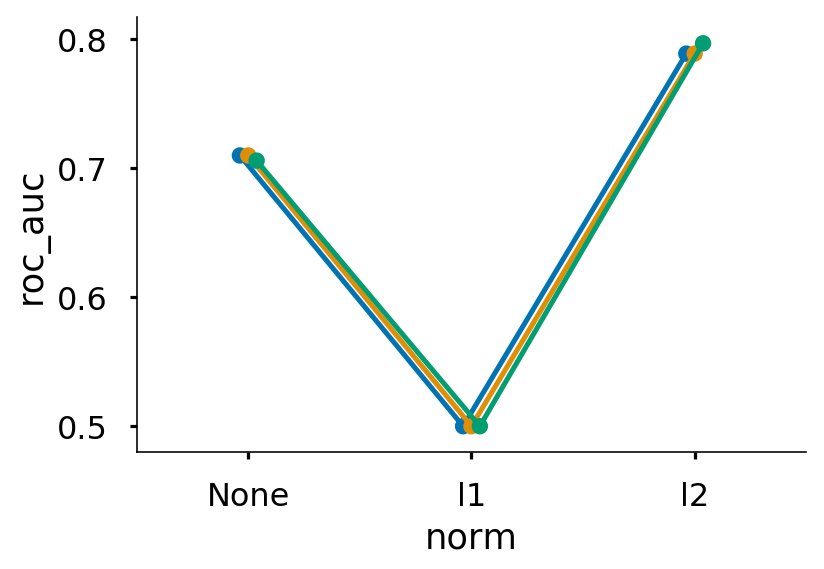

In [38]:
df_readmission = get_results('HipSurgery_1')
generate_lr_graphs('HipSurgery_1', filter_results(df_readmission, 'LR+'), metric='roc_auc')

/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

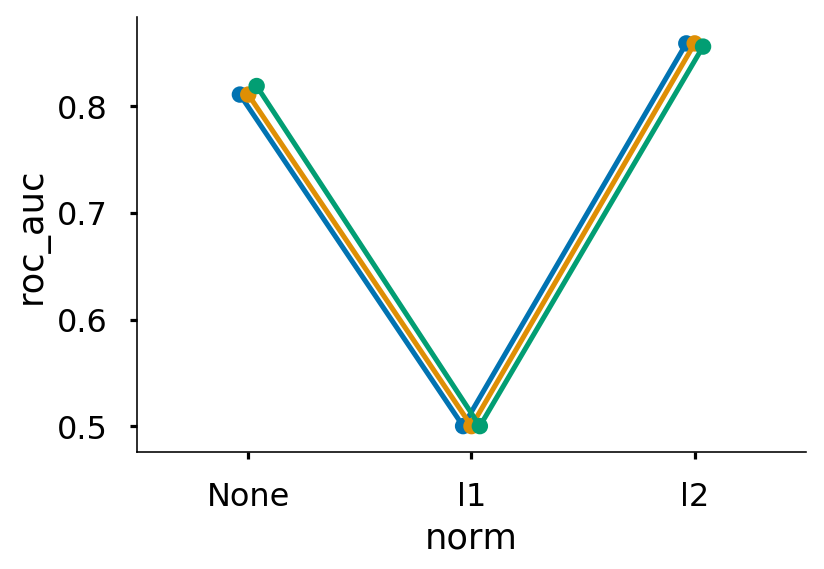

In [39]:
df_readmission = get_results('KneeSurgery_1')
generate_lr_graphs('KneeSurgery_1', filter_results(df_readmission, 'LR+'), metric='roc_auc')